In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Running the program "OD_growth_finder.py" will analyze an entire plate, create and save plots for each sample, save the data summary file, and create and save summary plots for the experiment.
If you want to analyze your data in a more interactive way, you can do so via the ipython notebook.

In [3]:
import growth_curve_analysis as od

There are many ways to use the functions in OD_growth_finder. To call specific functions, type od.function(inputs). See the readme file for a description of all of the functions and their input arguments.
Let's first get an overview of the experiment results.

In [9]:
demo_expt1 = od.analyze_experiment('./demo_files/demo_data.xlsx', plate_layout='./demo_files/demo_layout.xlsx',
                                   out_dir = './demo_files/', droplow=True, blank_file='./demo_files/demo_blank.xlsx')

blank value for E1 is [ 0.095]
blank value for E2 is [ 0.095]
blank value for E3 is [ 0.094]
blank value for E4 is [ 0.095]
blank value for E5 is [ 0.095]
blank value for E6 is [ 0.094]
blank value for E7 is [ 0.095]
blank value for E8 is [ 0.095]
blank value for E9 is [ 0.096]
blank value for E10 is [ 0.095]
blank value for E11 is [ 0.096]
blank value for E12 is [ 0.096]
blank value for F1 is [ 0.096]
blank value for F2 is [ 0.096]
blank value for F3 is [ 0.095]
blank value for F4 is [ 0.096]
blank value for F5 is [ 0.096]
blank value for F6 is [ 0.095]
blank value for F7 is [ 0.096]
blank value for F8 is [ 0.096]
blank value for F9 is [ 0.097]
blank value for F10 is [ 0.096]
blank value for F11 is [ 0.097]
blank value for F12 is [ 0.097]
blank value for G1 is [ 0.097]
blank value for G2 is [ 0.097]
blank value for G3 is [ 0.096]
blank value for G4 is [ 0.097]
blank value for G5 is [ 0.097]
blank value for G6 is [ 0.096]
blank value for G7 is [ 0.097]
blank value for G8 is [ 0.097]
bl

That created an excel file of the results in the specified output directory. Since we specified a plate_layout file, this information is added to the results (this comes in handy later). Here is what that looks like (first six rows only).

In [13]:
demo_expt2.results[:6]

,well,growth rate,r-squared,doubling time,time of max growth rate,lag time,OD at end of lag,saturation time,OD at saturation,max OD,time of max OD,row,column,strain,media,replicate,expt_date,run
1,A1,0.009197,0.998804,75.368542,70,NaN,NaN,260,0.833,0.918,900,1,1,003,YPD,1,2016-01-14,YPD+/-NaCl
2,A2,0.008975,0.999199,77.229943,90,NaN,NaN,280,0.837,1.097,930,1,2,003,YPD,2,2016-01-14,YPD+/-NaCl
3,A3,0.009103,0.998723,76.144706,80,NaN,NaN,270,0.845,0.926,880,1,3,003,YPD,3,2016-01-14,YPD+/-NaCl
4,A4,0.008911,0.998831,77.785043,70,NaN,NaN,270,0.934,0.993,880,1,4,227B,YPD,1,2016-01-14,YPD+/-NaCl
5,A5,0.008595,0.999165,80.643665,80,NaN,NaN,250,0.938,1.006,920,1,5,227B,YPD,2,2016-01-14,YPD+/-NaCl
6,A6,0.008403,0.998788,82.490539,80,NaN,NaN,250,0.923,0.993,760,1,6,227B,YPD,3,2016-01-14,YPD+/-NaCl


Now let's see an overview of the results in two plots.

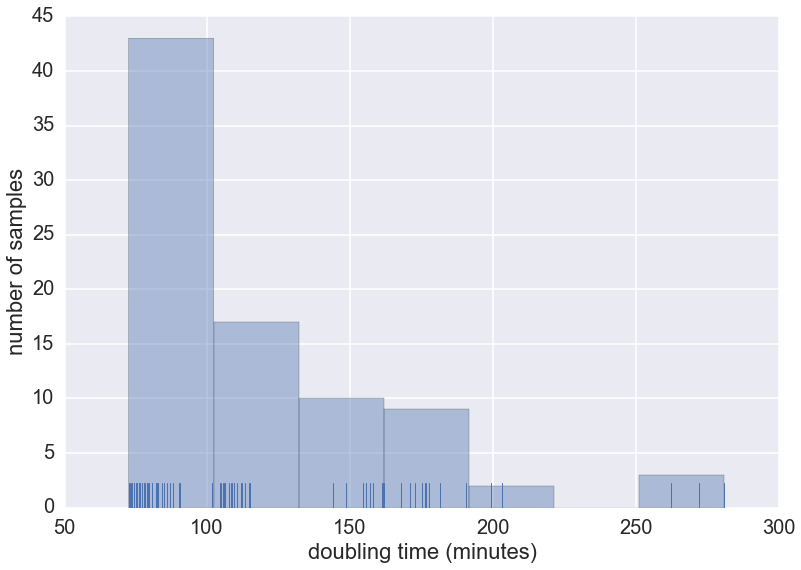

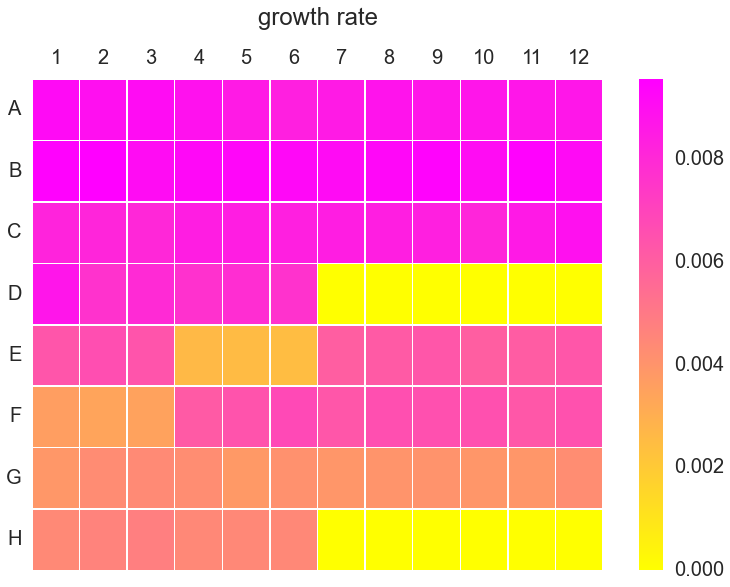

In [14]:
od.make_plots(demo_expt2)

This created a histogram showing the distribution of doubling times and a heatmap showing the growth rates (from which the doubling times are calculated).
We can actually plot any of the metrics on these plots. Here is a histogram of the growth rates. 

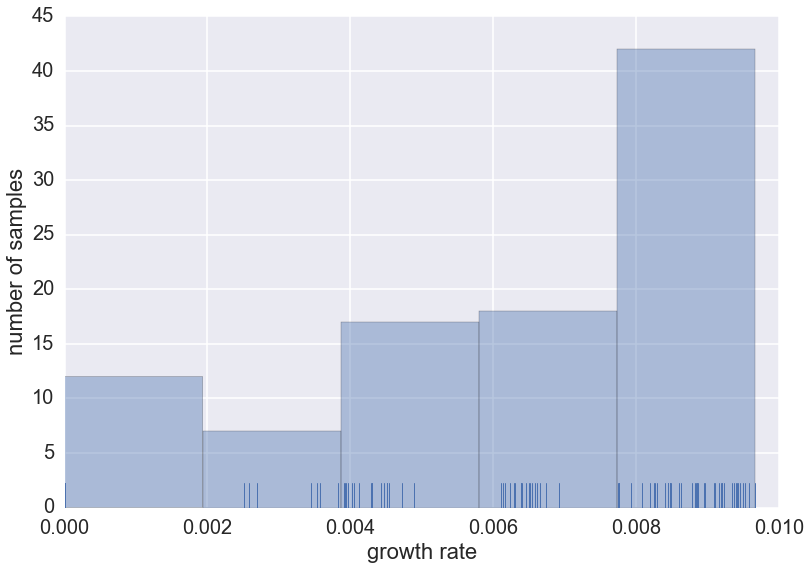

In [6]:
demo_expt1.plot_histogram(metric='growth rate', unit='')

And here are heat maps of doubling time and lag time.

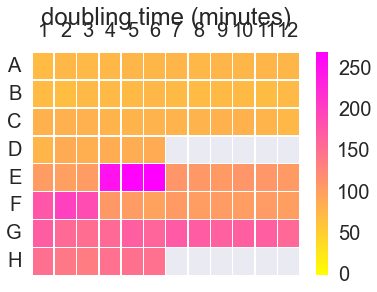

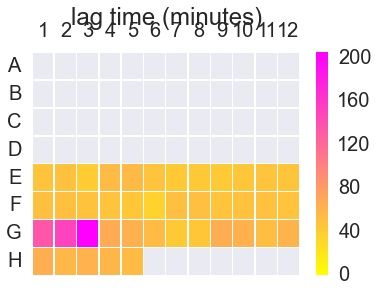

In [20]:
demo_expt1.plot_heatmap(metric='doubling time', unit='minutes')
demo_expt1.plot_heatmap(metric='lag time', unit='minutes')

Gray squares are those samples missing data. Many of the samples in this experiment had no detectable lag phase. 

Now let's see what a single sample's analysis looks like. We did not make sample plots in the first step (sample_plots=False is the default for analyze_experiment), so we have to make one now. We can get a sample's information using the well name.

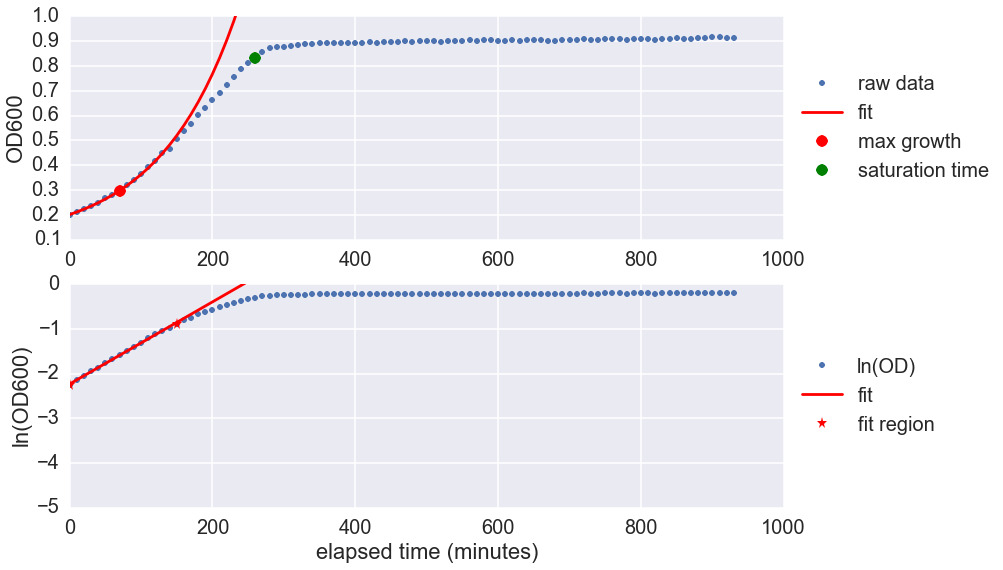

In [15]:
A1 = demo_expt2.samples['A1']
A1.plot_growth_parameters()

Here we have two plots. The upper plot is the original OD data (not adjusted by the blank value). The red line is the exponential curve that was fit to the ln(OD) data. This is seen as a straight line on the lower plot. The green point is the calculated time of saturation, and the black point is simply the maximum OD reached. This sample had no calculated lag time.

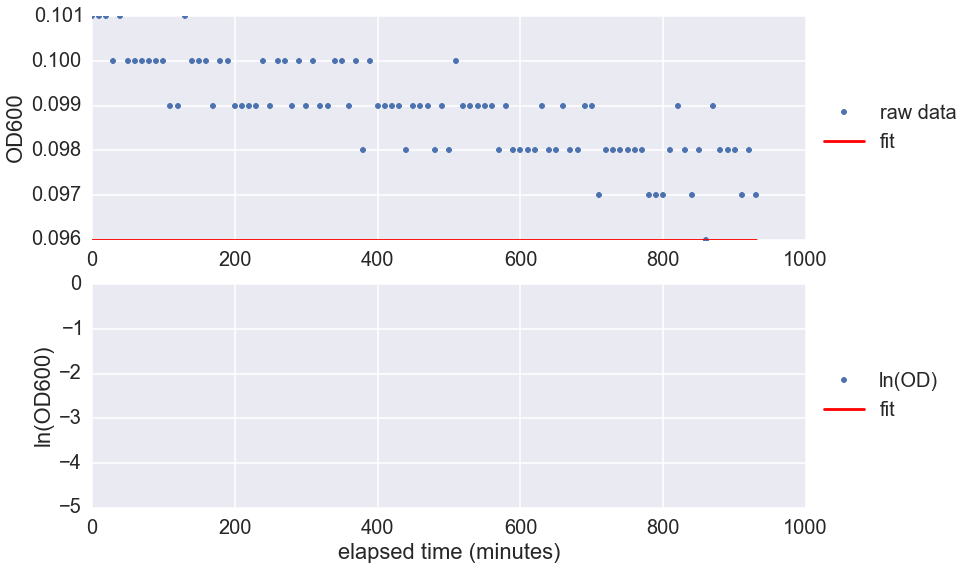

In [16]:
D7 = demo_expt2.samples['D7']
D7.plot_growth_parameters()

This is a much slower-growing sample.

Since I have replicates in the experiment, I want to calculate averages, grouping my samples by key features. I am going to group my samples by "strain" and "media", two details I included in the plate_layout file.

In [23]:
od.compute_means(demo_expt1, metric=['growth rate'], keys=['strain','media'])

growth rate          
                         mean       std
strain media                           
003    0.5 M NaCl    0.006680  0.000134
       YPD           0.009329  0.000189
178A   0.5 M NaCl    0.003650  0.000228
       YPD           0.009581  0.000262
178B   0.5 M NaCl    0.006653  0.000341
       YPD           0.009241  0.000204
190A   0.5 M NaCl    0.004306  0.000244
       YPD           0.008288  0.000101
190B   0.5 M NaCl    0.004238  0.000142
       YPD           0.008662  0.000047
202A   0.5 M NaCl    0.006577  0.000092
       YPD           0.009497  0.000061
202B   0.5 M NaCl    0.006646  0.000131
       YPD           0.009462  0.000200
214A   0.5 M NaCl    0.006335  0.000129
       YPD           0.008913  0.000087
214B   0.5 M NaCl    0.006325  0.000152
       YPD           0.008866  0.000100
224A   0.5 M NaCl    0.004790  0.000238
       YPD           0.008256  0.000559
224B   0.5 M NaCl    0.004599  0.000022
       YPD           0.007876  0.000109
226A   0.5 M NaCl    0.004032  0.000075
       YPD           0.008512  0.000098
226C   0.5 M NaCl    0.004151  0.000146
       YPD           0.008720  0.000397
227B   0.5 M NaCl    0.002643  0.000108
       YPD           0.008983  0.000174
blank  0.5 M NaCl         NaN       NaN
       YPD                NaN       NaN

We can actually do this for many different metrics at the same time. If we include save=True, this saves the results to an excel file.

In [24]:
od.compute_means(demo_expt1, metric=['growth rate', 'doubling time', 'lag time', 
                                     'saturation time', 'max OD'], 
                 save=True, keys=['strain','media'])

growth rate           doubling time               lag time  \
                         mean       std          mean        std        mean   
strain media                                                                   
003    0.5 M NaCl    0.006680  0.000134    103.787983   2.057706   46.306516   
       YPD           0.009329  0.000189     74.322828   1.504395         NaN   
178A   0.5 M NaCl    0.003650  0.000228    190.390167  11.969283   50.512238   
       YPD           0.009581  0.000262     72.379457   1.993372         NaN   
178B   0.5 M NaCl    0.006653  0.000341    104.360624   5.265517   43.091365   
       YPD           0.009241  0.000204     75.029308   1.680560         NaN   
190A   0.5 M NaCl    0.004306  0.000244    161.340519   9.346360  164.237254   
       YPD           0.008288  0.000101     83.643496   1.016301         NaN   
190B   0.5 M NaCl    0.004238  0.000142    163.661002   5.516333   62.121826   
       YPD           0.008662  0.000047     80.021124   0.434317         NaN   
202A   0.5 M NaCl    0.006577  0.000092    105.404288   1.473268   50.394023   
       YPD           0.009497  0.000061     72.986354   0.468027         NaN   
202B   0.5 M NaCl    0.006646  0.000131    104.319575   2.059911   49.388551   
       YPD           0.009462  0.000200     73.275951   1.534251         NaN   
214A   0.5 M NaCl    0.006335  0.000129    109.440028   2.219359   43.571152   
       YPD           0.008913  0.000087     77.772268   0.754955         NaN   
214B   0.5 M NaCl    0.006325  0.000152    109.636852   2.603427   47.224483   
       YPD           0.008866  0.000100     78.182931   0.885512         NaN   
224A   0.5 M NaCl    0.004790  0.000238    144.939675   7.346424   61.454764   
       YPD           0.008256  0.000559     84.214702   5.626252         NaN   
224B   0.5 M NaCl    0.004599  0.000022    150.728144   0.710213   57.009259   
       YPD           0.007876  0.000109     88.017115   1.216782         NaN   
226A   0.5 M NaCl    0.004032  0.000075    171.952106   3.196121   51.769114   
       YPD           0.008512  0.000098     81.437512   0.938896         NaN   
226C   0.5 M NaCl    0.004151  0.000146    167.124052   5.769350   58.834356   
       YPD           0.008720  0.000397     79.599853   3.646431         NaN   
227B   0.5 M NaCl    0.002643  0.000108    262.503885  10.527281   52.981455   
       YPD           0.008983  0.000174     77.179249   1.478149         NaN   
blank  0.5 M NaCl         NaN       NaN           NaN        NaN         NaN   
       YPD                NaN       NaN           NaN        NaN         NaN   

                             saturation time               max OD            
                         std            mean        std      mean       std  
strain media                                                                 
003    0.5 M NaCl   4.702804      393.333333  11.547005  0.926333  0.015948  
       YPD               NaN      270.000000  10.000000  0.980333  0.101115  
178A   0.5 M NaCl   0.936498      613.333333  25.166115  0.692667  0.017559  
       YPD               NaN      260.000000   0.000000  0.992000  0.009165  
178B   0.5 M NaCl   5.581041      373.333333  15.275252  0.944000  0.109234  
       YPD               NaN      283.333333  32.145503  0.973667  0.035218  
190A   0.5 M NaCl  36.424355      670.000000  81.853528  0.728000  0.017349  
       YPD               NaN      363.333333  40.414519  0.899333  0.006807  
190B   0.5 M NaCl   6.494330      393.333333  15.275252  0.812333  0.017098  
       YPD               NaN      233.333333   5.773503  0.974333  0.075923  
202A   0.5 M NaCl   1.782977      393.333333   5.773503  0.991333  0.091675  
       YPD               NaN      270.000000   0.000000  0.992667  0.015535  
202B   0.5 M NaCl   0.858466      396.666667  30.550505  1.008333  0.076788  
       YPD               NaN      256.666667  11.547005  0.975333  0.014364  
214A   0.5 M NaCl   0.910457      353.333333   5.77